In [1]:
# Conformal Prediction Example1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
# Read input data

In [2]:
data =  pd.read_csv('problem7.csv')
data.head()
print(data.head())

   Yield  Current  Total   ROA  ctype
0    0.0   202.42 -55.04 -2.90      0
1    0.0   303.40 -34.51 -1.89      0
2    0.0   332.55 -33.60 -2.55      0
3    0.0   134.82 -29.74 -4.95      0
4    5.8   131.41 -29.24  1.18      1


In [5]:
data1 =  pd.read_csv('problem61.csv')
data1.head()

,Yield,Current,cType
0,0.00,15.63,1
1,0.00,16.60,1
2,0.94,17.88,1
3,0.00,30.96,1
4,0.00,33.59,1


In [6]:
# 驗證是否讀取正確

In [3]:
print(data)

      Yield  Current   Total    ROA  ctype
0      0.00   202.42  -55.04  -2.90      0
1      0.00   303.40  -34.51  -1.89      0
2      0.00   332.55  -33.60  -2.55      0
3      0.00   134.82  -29.74  -4.95      0
4      5.80   131.41  -29.24   1.18      1
...     ...      ...     ...    ...    ...
1000   0.87   237.86  103.10   3.73      0
1001   1.64  1318.70  112.51  50.37      0
1002   0.00   457.87  116.94  -2.04      0
1003   1.37   840.60  118.90  17.76      0
1004   0.68   271.89  163.34   5.15      0

[1005 rows x 5 columns]


In [8]:
# 資料筆數

In [4]:
totalsample=data.shape[0]
print(totalsample)

1005


In [10]:
# 資料分割

In [5]:
X = data.iloc[:,0:4].values
Y = data['ctype'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .25,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

In [12]:
X1 = data1.iloc[:,0:2].values
Y1 = data1['cType'].values
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X,Y,test_size =0.25,random_state = 0)

In [13]:
# 資料正規化

In [6]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [15]:
stdscaler = StandardScaler()
X_train1 = stdscaler.fit_transform(X_train1)
X_test1 = stdscaler.transform(X_test1)

In [16]:
#建立Naive Bayes model

In [7]:
clf = GaussianNB(var_smoothing=0.0001)
clf.fit(X_train,Y_train)

GaussianNB(var_smoothing=0.0001)

In [8]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 61  16]
 [  4 171]]


In [9]:
y_predproba=clf.predict_proba(X_test)
y_predprobatrain=clf.predict_proba(X_train)

In [15]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))

Accuracy score: 0.9206349206349206


0.9206349206349206 accuracy
0.9144385026737968 precision

0.9771428571428571 recall

0.9447513812154696 f1 score

0.9818923933209648 AUC


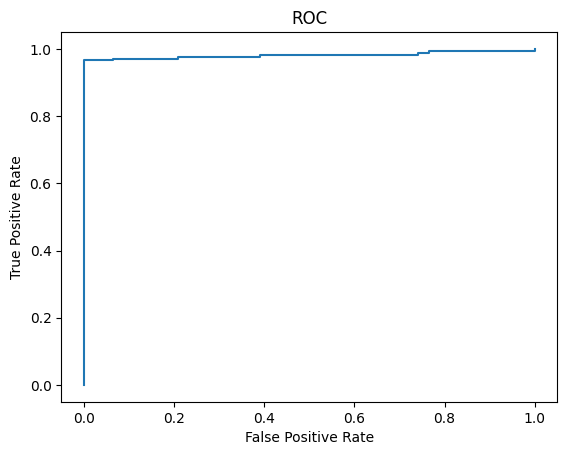

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predproba[:,1])

df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc2.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(Y_test,y_pred),"accuracy")
print(precision_score(Y_test,y_pred),"precision")
print()
print(recall_score(Y_test,y_pred),"recall")
print()
print(f1_score(Y_test,y_pred),"f1 score")
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc,"AUC")

In [11]:
df1=data[data.ctype==0]
class1evidence=df1.shape[0]/totalsample
print(class1evidence)
df2=data[data.ctype==1]
class2evidence=df2.shape[0]/totalsample
print(class2evidence)

0.3611940298507463
0.6388059701492538


In [12]:
import openpyxl
wb=openpyxl.Workbook()
s1=wb.active
s1['A1']='Yield'
s1['B1']='Current'
s1['C1']='Total'
s1['D1']='ROA'
s1['E1']='MP'
wb.save('output.xlsx')

In [14]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
zp=[]
mp=[]
px=[]
py=[]
workbook=openpyxl.load_workbook('output.xlsx')
sheet=workbook.active

for i in range(traintotal):
    if(Y_traino[i]==0):
        yp.append(y_predprobatrain[i,0])
        xp.append(X_traino[i,:])
        
testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==0):
        yp.append(y_predproba[i,0])
        xp.append(X_testo[i,:])
        
df1=data[data.ctype==0]

for k in range(df1.shape[0]):
    zp.append(yp[k]*class1evidence)
    mp.append(0)

for i in range(df1.shape[0]):
    zz=0
    for j in range(df1.shape[0]):
        if(zp[i]>=zp[j]):
            zz=zz+1
    mp[i]=zz/df1.shape[0]
zsup=max(zp)
j=2
for k in range(len(yp)):
    if(mp[k]>0.5):
        sheet.cell(j,1).value=xp[k][0]
        sheet.cell(j,2).value=xp[k][1]
        sheet.cell(j,3).value=xp[k][2]
        sheet.cell(j,4).value=xp[k][3]
        sheet.cell(j,5).value=mp[k]
        j+=1
workbook.save('output.xlsx')

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
y_pred3=knn.predict(X_test)

In [16]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test,y_pred3)
auc_score7=roc_auc_score(Y_test, y_pred3)
print(fpr3)
print(tpr3)
print(thresholds3)
print(auc_score7)
y_pred3 = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm3 = confusion_matrix(Y_test, y_pred3)
print(cm3)

[0.         0.03896104 1.        ]
[0.         0.96571429 1.        ]
[inf  1.  0.]
0.9633766233766234
[[ 74   3]
 [  6 169]]


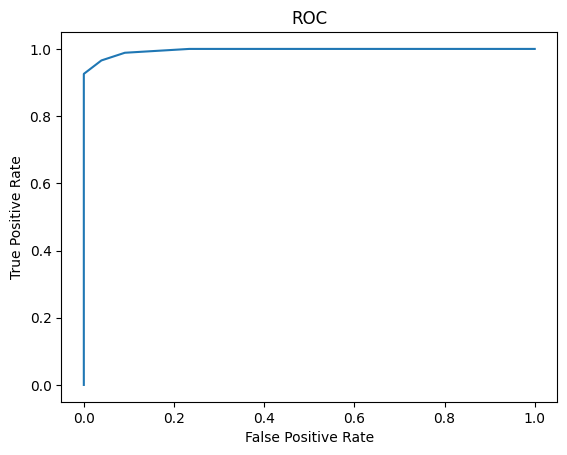

In [17]:
y_predproba12=knn.predict_proba(X_test)
false_positive_rate12, true_positive_rate12, thresholds12 = roc_curve(Y_test, y_predproba12[:,1])
df6 = pd.DataFrame({'Threshold': thresholds12, 
              'TPR': true_positive_rate12, 
              'FPR':false_positive_rate12
             })
df6.to_csv("roc12.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate12, true_positive_rate12)

In [28]:
from sklearn.ensemble import ExtraTreesClassifier

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, Y_train)
y_pred7 = logistic_classifier.predict(X_test)
print(confusion_matrix(Y_test,y_pred7))
from sklearn.metrics import roc_curve, auc
fpr31, tpr31, thresholds31 = roc_curve(Y_test,y_pred7)
auc_score8=roc_auc_score(Y_test, y_pred7)
print(fpr31)
print(tpr31)
print(thresholds31)
print(auc_score8)
from sklearn.metrics import confusion_matrix,accuracy_score
cm31 = confusion_matrix(Y_test, y_pred7)
print(cm31)

[[ 95   1]
 [  0 156]]
[0.         0.01041667 1.        ]
[0. 1. 1.]
[inf  1.  0.]
0.9947916666666667
[[ 95   1]
 [  0 156]]


In [18]:
import sklearn.neural_network 
neural_network = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(4, ), activation='relu',alpha=1.e-5,solver='adam')
neural_network.fit(X_train, Y_train) 
y_pred10 = neural_network.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
from sklearn.metrics import roc_curve, auc
fpr10, tpr10, thresholds10 = roc_curve(Y_test,y_pred10)
auc_score10=roc_auc_score(Y_test, y_pred10)
print(fpr10)
print(tpr10)
print(thresholds10)
print(auc_score10)
from sklearn.metrics import confusion_matrix,accuracy_score
cm10 = confusion_matrix(Y_test, y_pred10)
print(cm10)

[0.         0.01298701 1.        ]
[0.         0.93142857 1.        ]
[inf  1.  0.]
0.9592207792207793
[[ 76   1]
 [ 12 163]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
import sklearn.svm 
# Create an instance of the SVC class 
svm = sklearn.svm.SVC(kernel='rbf', C=1.0) 
# Fit the model to the training data 
svm.fit(X_train1, Y_train1) 
# Predict the labels of new data 
y_pred11 = svm.predict(X_test1)
fpr11, tpr11, thresholds11 = roc_curve(Y_test1,y_pred11)
auc_score11=roc_auc_score(Y_test1, y_pred11)
print(fpr11)
print(tpr11)
print(thresholds11)
print(auc_score11)
from sklearn.metrics import confusion_matrix,accuracy_score
cm11 = confusion_matrix(Y_test1, y_pred11)
print(cm11)

[0.         0.01041667 1.        ]
[0.         0.99358974 1.        ]
[inf  1.  0.]
0.9915865384615384
[[ 95   1]
 [  1 155]]


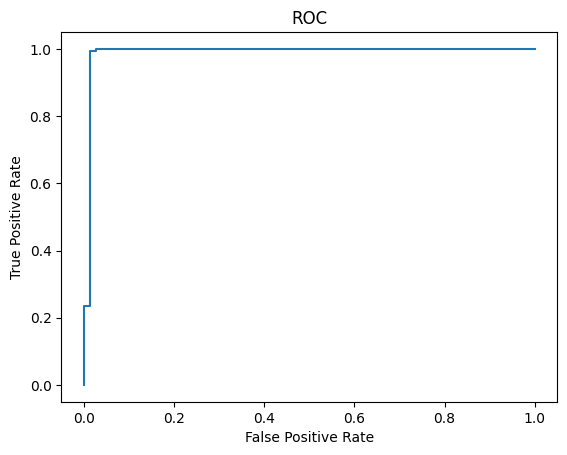

In [20]:
y_predproba11=neural_network.predict_proba(X_test)
false_positive_rate11, true_positive_rate11, thresholds11 = roc_curve(Y_test, y_predproba11[:,1])
df3 = pd.DataFrame({'Threshold': thresholds11, 
              'TPR': true_positive_rate11, 
              'FPR':false_positive_rate11
             })
df3.to_csv("roc10.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate11, true_positive_rate11)

In [35]:
y_predproba11=KNeighborsClassifier.predict_proba(X_test)
false_positive_rate11, true_positive_rate11, thresholds11 = roc_curve(Y_test, y_predproba11[:,1])
df3 = pd.DataFrame({'Threshold': thresholds11, 
              'TPR': true_positive_rate11, 
              'FPR':false_positive_rate11
             })
df3.to_csv("roc13.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate11, true_positive_rate11)

TypeError: KNeighborsClassifier.predict_proba() missing 1 required positional argument: 'X'